In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_Iter = pd.read_excel('Iterations.xlsx',sheet_name = 'Sheet1')
df_Iter = df_Iter.fillna(0)
df_Iter.head()

,w(equity),w(effectiveness),w(efficiency),S1,S2,S3,S4,S5,S6,S7,...,S491,S492,S493,S494,S495,S496,S497,S498,S499,S500
0,0.09,0.64,0.27,4855,55,44,43,43,43,43,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.15,0.63,0.22,4855,47,27,27,17,17,17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.27,0.56,0.17,4855,71,66,36,36,29,29,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.02,0.64,0.34,4855,15,13,6,6,3,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.34,0.51,0.15,4855,60,32,16,8,8,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<h3>Create the trend chart for 3 converged and 3 not-converged runs</h3>

In [3]:
df_Trend = df_Iter.drop(['w(equity)','w(effectiveness)','w(efficiency)'],1)
df_Trend.head()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S491,S492,S493,S494,S495,S496,S497,S498,S499,S500
0,4855,55,44,43,43,43,43,43.0,25.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4855,47,27,27,17,17,17,16.0,16.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4855,71,66,36,36,29,29,19.0,19.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4855,15,13,6,6,3,3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4855,60,32,16,8,8,8,8.0,8.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


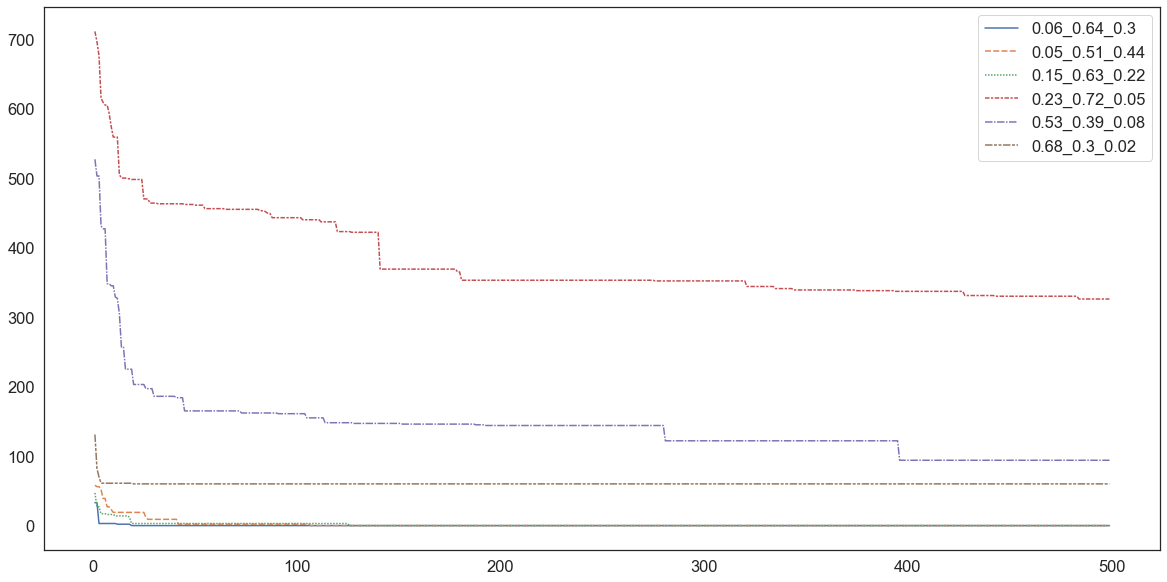

In [16]:
# Randomly select rows
import random
randomlist = [random.sample(range(0, 22), 3), random.sample(range(23, 61), 3)]
flat_list = [item for sublist in randomlist for item in sublist]
df_Trend_Chart = df_Trend.loc[flat_list,:].T

# Generating the column names according to the respective weights
tempdf = df_Iter.iloc[flat_list,0:3].round(2)
cols = ['w(equity)', 'w(effectiveness)', 'w(efficiency)']
tempdf['combined'] = tempdf[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
df_Trend_Chart.columns = tempdf['combined'].tolist()


# Remove the first iteration values
df_Trend_Chart = df_Trend_Chart.reset_index(drop = True)
df_Trend_Chart = df_Trend_Chart.drop(0)


# Chart
sns.set(rc={'figure.figsize':(20,10)})
sns.set(font_scale = 1.5)
with sns.axes_style("white"):
    ax = sns.lineplot(data = df_Trend_Chart)

<h3>Average number of iterations at each 50th iterations</h3>

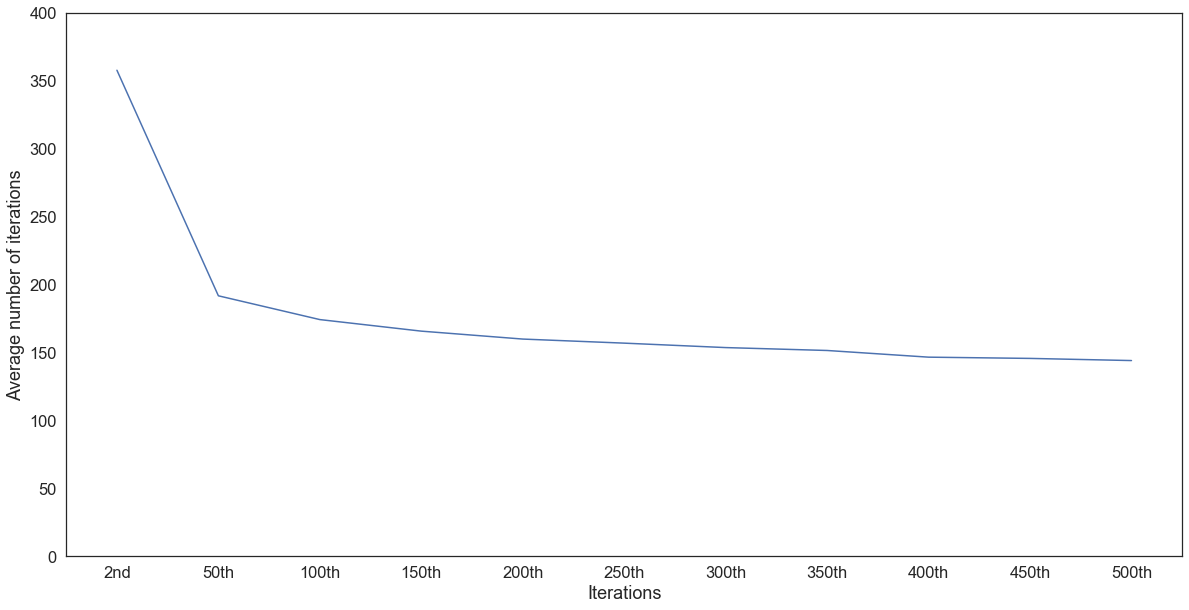

In [5]:
AvgNumIter = [df_Iter['S2'].mean(), df_Iter['S50'].mean(), df_Iter['S100'].mean(), df_Iter['S150'].mean(),
              df_Iter['S200'].mean(), df_Iter['S250'].mean(), df_Iter['S300'].mean(), df_Iter['S350'].mean(),
              df_Iter['S400'].mean(), df_Iter['S450'].mean(), df_Iter['S500'].mean()]

XLabel = ['2nd','50th','100th','150th','200th','250th','300th','350th','400th','450th','500th']

with sns.axes_style('white'):
    plt.figure(facecolor=(1,1,1))
    plt.plot(XLabel, AvgNumIter)
    plt.ylabel('Average number of iterations')
    plt.xlabel('Iterations')
    plt.ylim([0, 400])
    plt.show()

<h3>Zero vs. Non-zero weights</h3>

In [6]:
df_znz =  pd.read_excel('weights.xlsx')
df_znz = df_znz.drop('cvsnc',1)
df_znz.head()

,w(equity),w(effectiveness),w(efficiency),zvsnz
0,0.09,0.64,0.27,nonzero
1,0.15,0.63,0.22,nonzero
2,0.27,0.56,0.17,nonzero
3,0.02,0.64,0.34,nonzero
4,0.34,0.51,0.15,nonzero


In [7]:
sns.set(font_scale = 1.5)

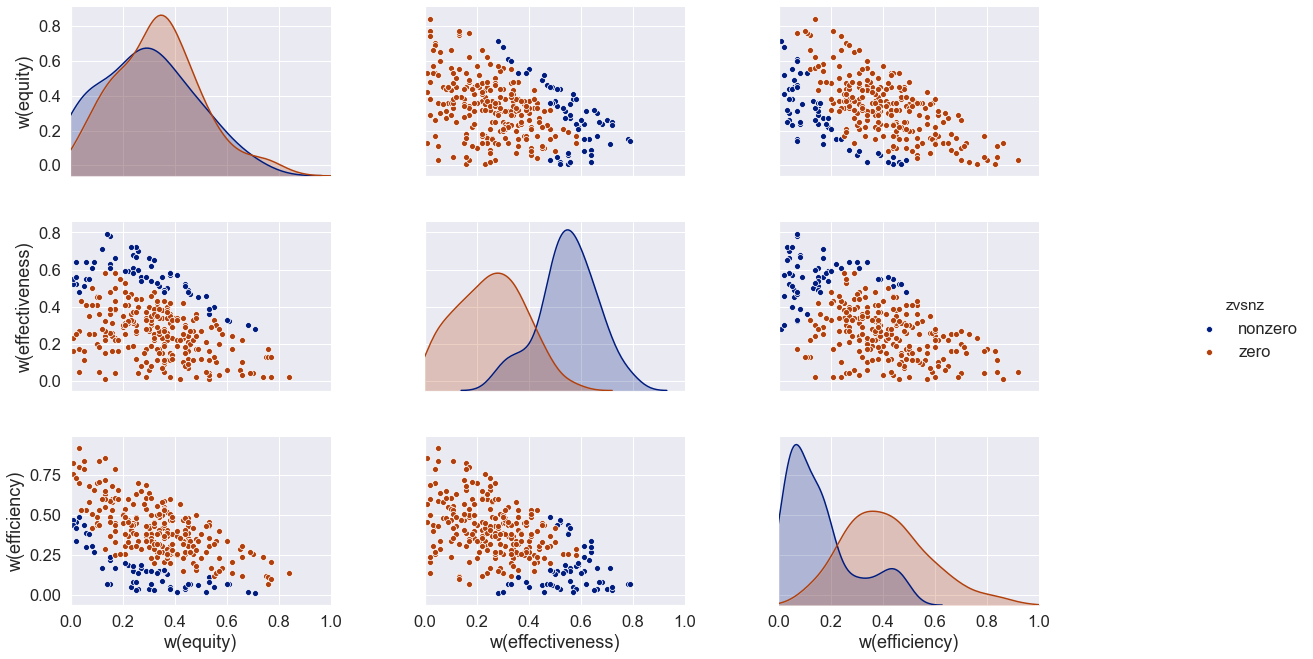

In [8]:
g = sns.pairplot(df_znz, hue = 'zvsnz', palette = 'dark')
g.axes[0,2].set_xlim((0,1))
g.axes[2,0].set_xlim((0,1))
g.axes[0,0].set_xlim((0,1))
g.axes[0,0].set_xlim((0,1))
g.axes[0,1].set_xlim((0,1))
g.axes[1,0].set_xlim((0,1))
g.fig.set_size_inches(20,10)

<h3>Distribution of weights on equity, effectiveness, and efficiency</h3>

In [9]:
df_1617 = pd.read_excel('WeightsDist1617.xlsx')
df_1617.head()

,Epsilon,w(equity),w(effetiveness),w(efficiency)
0,0.001,0.02,0.39,0.59
1,0.001,0.09,0.29,0.62
2,0.001,0.09,0.37,0.54
3,0.001,0.16,0.35,0.49
4,0.001,0.20,0.27,0.53


In [10]:
df_1617 = df_1617.drop('Epsilon', axis = 1)
df_1617.head()

,w(equity),w(effetiveness),w(efficiency)
0,0.02,0.39,0.59
1,0.09,0.29,0.62
2,0.09,0.37,0.54
3,0.16,0.35,0.49
4,0.20,0.27,0.53


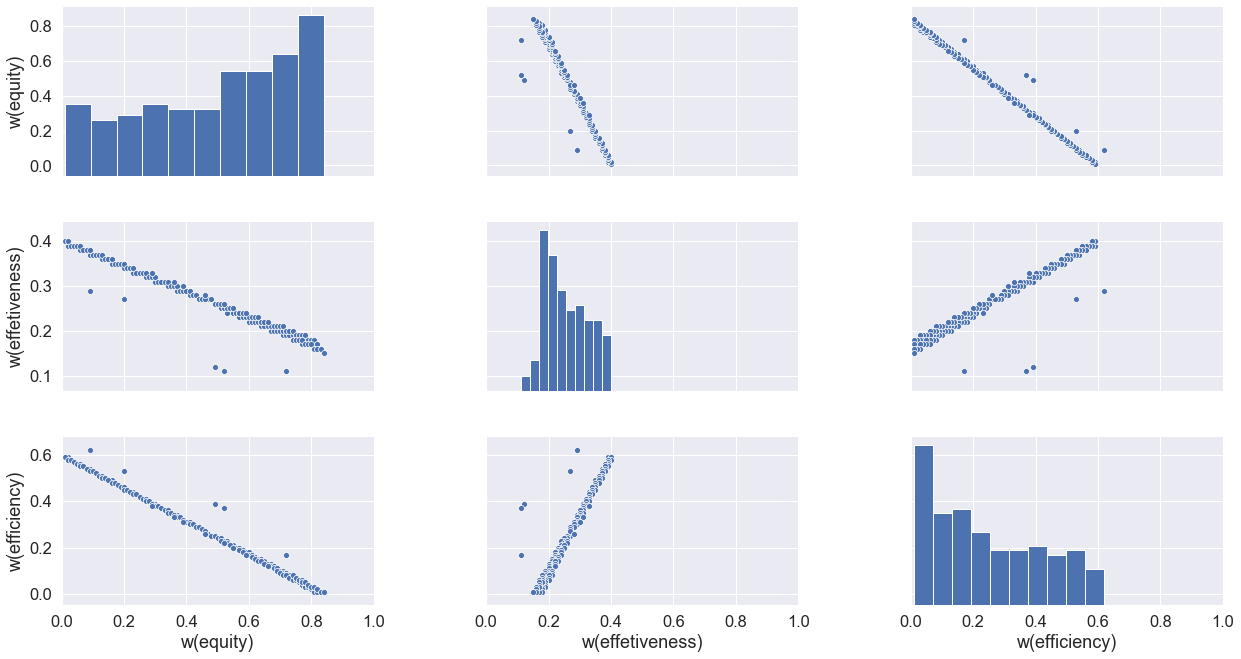

In [11]:
h = sns.pairplot(df_1617, palette = 'dark')
h.axes[0,2].set_xlim((0,1))
h.axes[2,0].set_xlim((0,1))
h.axes[0,0].set_xlim((0,1))
h.axes[0,0].set_xlim((0,1))
h.axes[0,1].set_xlim((0,1))
h.axes[1,0].set_xlim((0,1))
h.fig.set_size_inches(20,10)